## FOREST COVER TYPE PREDICTION

### Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore")

### Import the data

In [3]:
data = pd.read_csv('covtype.csv')

In [4]:
data

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581008,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581009,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581010,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [5]:
print('Data Dimensions:','Rows(Records):', data.shape[0],'Columns(Features):', data.shape[1])

Data Dimensions: Rows(Records): 581012 Columns(Features): 55


### Data information:

__Elevation__                        = Height in meters.<br>
__Aspect__                            = Aspect in degrees azimuth.<br>
__Slope__                            = Slope in degrees.<br>
__Horizontal_Distance_To_Hydrology__  = Horizontal distance to nearest surface water features.<br>
__Vertical_Distance_To_Hydrology__    = Vertical distance to nearest surface water features.<br>
__Horizontal_Distance_To_Roadways__   = Horizontal distance to nearest roadway.<br>
__Hillshade_9am__                     = Hill shade index at 9am, summer equinox. Value out of 255.<br>
__Hillshade_Noon__                   = Hill shade index at noon, summer equinox. Value out of 255.<br>
__Hillshade_3pm__                    = Hill shade index at 3pm, summer equinox. Value out of 255.<br> __Horizontal_Distance_To_Fire_Point__ = Horizontal distance to nearest wildfire ignition points.<br>
__Wilderness_Area1__                  = Rawah Wilderness Area<br>
__Wilderness_Area2__                  = Neota Wilderness Area<br>
__Wilderness_Area3__                  = Comanche Peak Wilderness Area<br>
__Wilderness_Area4__                 = Cache la Poudre Wilderness Area<br>
__Soil_Type1 to Soil_Type40__         = Type of the soil.<br>
__Cover_TypeForest__                 = Cover type, integer value between 1 and 7, with the following key:<br>

1. `Spruce/Fir`<br>
2. `Lodgepole Pine`<br>
3. `Ponderosa Pine`<br>
4. `Cottonwood/Willow`<br>
5. `Aspen`<br>
6. `Douglas-fir`<br>
7. `Krummholz`<br>

#### Checking for missing values:

In [6]:
data.isnull().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Wilderness_Area1                      0
Wilderness_Area2                      0
Wilderness_Area3                      0
Wilderness_Area4                      0
Soil_Type1                            0
Soil_Type2                            0
Soil_Type3                            0
Soil_Type4                            0
Soil_Type5                            0
Soil_Type6                            0
Soil_Type7                            0
Soil_Type8                            0
Soil_Type9                            0
Soil_Type10                           0
Soil_Type11                           0


There aren't any missing values. We can check for the data description.

In [7]:
data.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


In [8]:
skewness = data.skew()
skewness

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area1                        0.205618
Wilderness_Area2                        4.061595
Wilderness_Area3                        0.257822
Wilderness_Area4                        3.575561
Soil_Type1                             13.736670
Soil_Type2                              8.615358
Soil_Type3                             10.838630
Soil_Type4                              6.625176
Soil_Type5                             18.995243
Soil_Type6                              9.240061
Soil_Type7          

The skewness for a normal distribution is zero, and any symmetric data should have a skewness near zero. Negative values for the skewness indicate data that are skewed left and positive values for the skewness indicate data that are skewed right.

Text(0.5, 1.0, 'Skewness of Features')

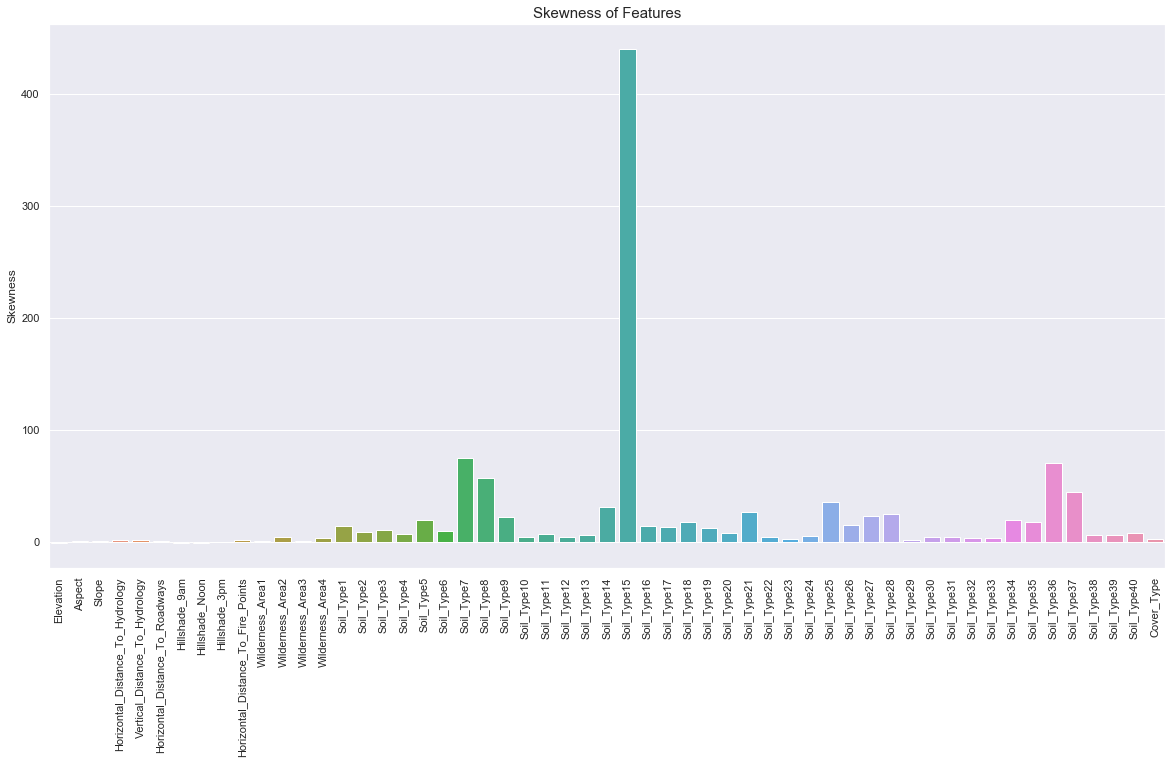

In [9]:
skew = pd.DataFrame(skewness, index=None, columns=['Skewness'])
plt.figure(figsize=(20,10))
sns.barplot(x=skew.index, y='Skewness', data=skew)
plt.xticks(rotation=90)
plt.title('Skewness of Features',fontsize=15)

As we can see in the graph, some of the variables have high skewness.

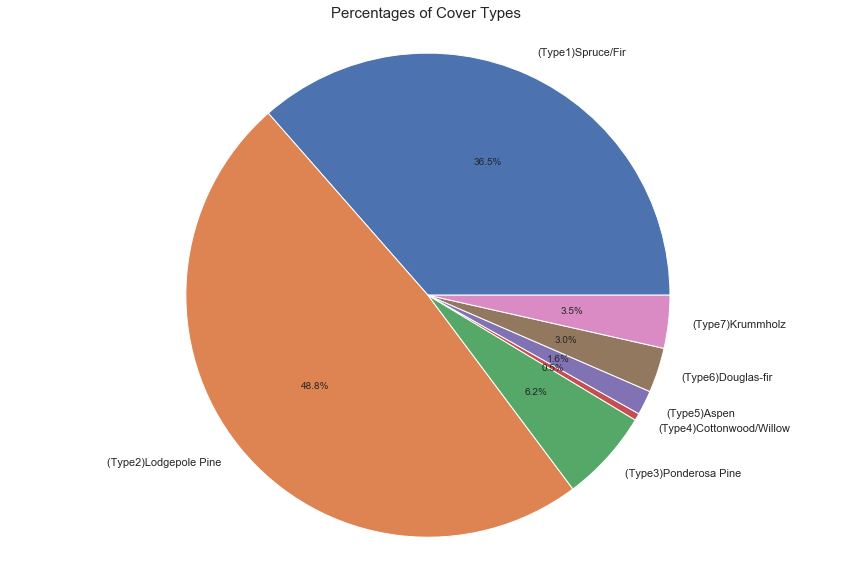

In [10]:
class_dist = data.groupby('Cover_Type').size()
labels= '(Type1)Spruce/Fir', '(Type2)Lodgepole Pine', '(Type3)Ponderosa Pine', '(Type4)Cottonwood/Willow', '(Type5)Aspen', '(Type6)Douglas-fir', '(Type7)Krummholz'
fig1, ax1 = plt.subplots()
fig1.set_size_inches(15,10)
ax1.pie(class_dist, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Percentages of Cover Types',fontsize=15)
plt.show()

Type1 and Type2 are lead cover type of the area. Type4 is the least.

In [11]:
features = data.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
soiltype = data.loc[:,'Soil_Type1':'Soil_Type40']
wilderness = data.loc[:,'Wilderness_Area1':'Wilderness_Area4']

## Data Analysis

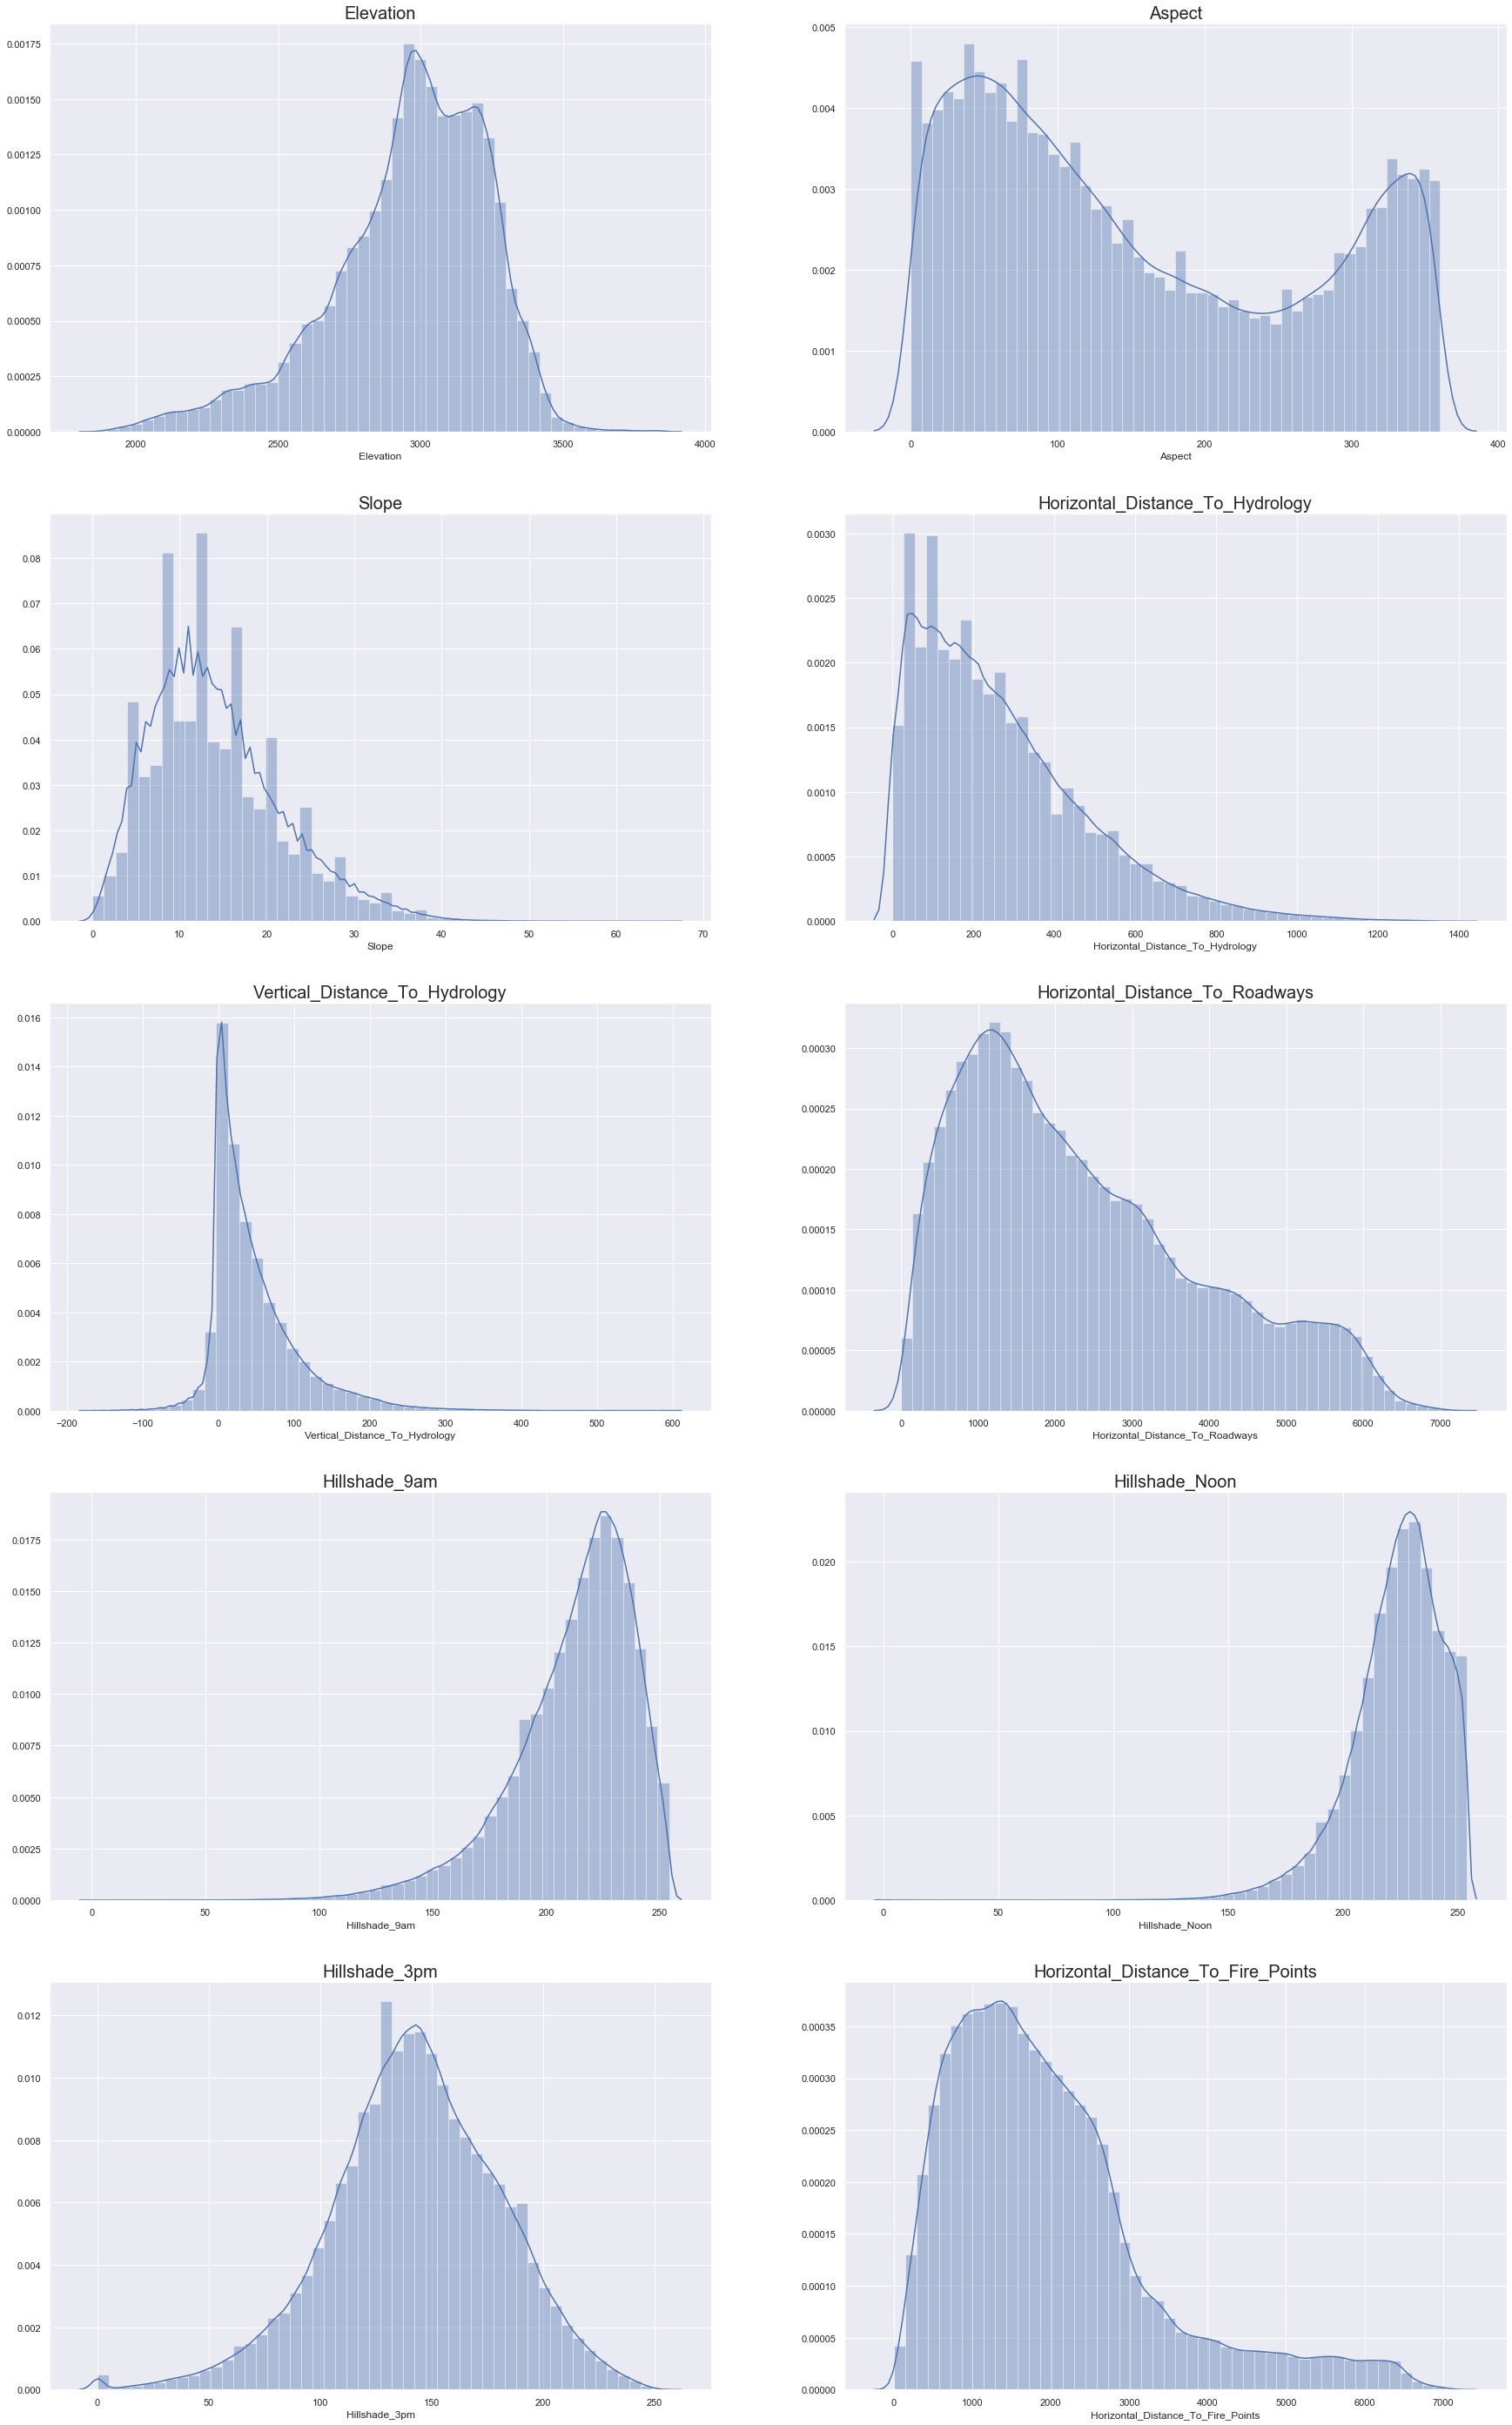

In [12]:
plt.figure(figsize=(30, 50))
for i,col in enumerate(features.columns.values):
    plt.subplot(5,2,i+1)
    sns.distplot(features[col])
    plt.title(col, fontsize=20)
    
plt.show()

We can see the skewnesses on the graphs better.

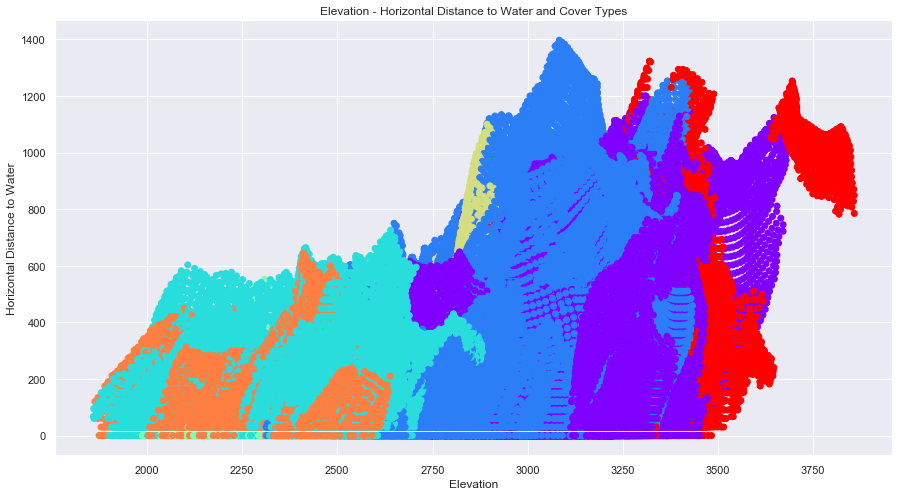

In [13]:
plt.figure(figsize=(15,8))
plt.scatter(data["Elevation"], data["Horizontal_Distance_To_Hydrology"],c=data["Cover_Type"],cmap="rainbow")
plt.title('Elevation - Horizontal Distance to Water and Cover Types')
plt.xlabel('Elevation')
plt.ylabel('Horizontal Distance to Water')
plt.show()

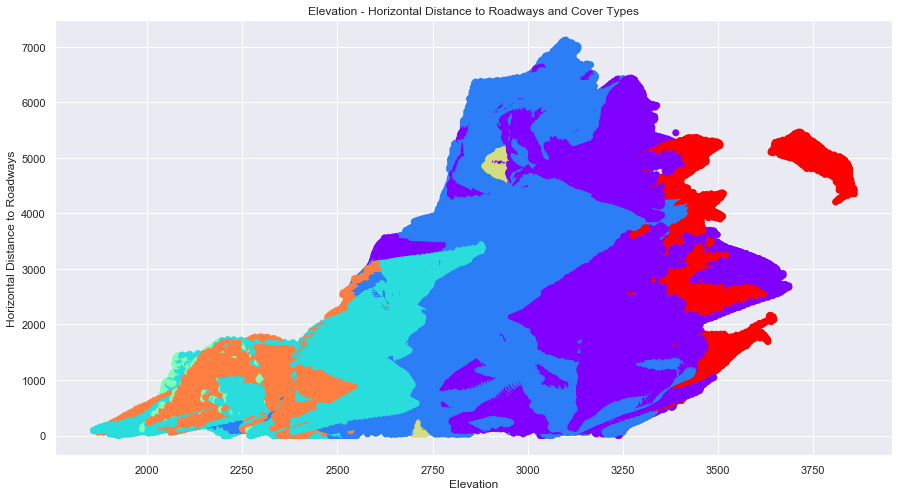

In [14]:
plt.figure(figsize=(15,8))
plt.scatter(data["Elevation"], data["Horizontal_Distance_To_Roadways"],c=data["Cover_Type"],cmap="rainbow")
plt.title('Elevation - Horizontal Distance to Roadways and Cover Types')
plt.xlabel('Elevation')
plt.ylabel('Horizontal Distance to Roadways')
plt.show()

In [15]:
#data.shape = (581012, 55)
feat = features.copy()

In [16]:
feat['Cover_Type'] = data['Cover_Type']
feat

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,5
1,2590,56,2,212,-6,390,220,235,151,6225,5
2,2804,139,9,268,65,3180,234,238,135,6121,2
3,2785,155,18,242,118,3090,238,238,122,6211,2
4,2595,45,2,153,-1,391,220,234,150,6172,5
...,...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837,3
581008,2391,152,19,67,12,95,240,237,119,845,3
581009,2386,159,17,60,7,90,236,241,130,854,3
581010,2384,170,15,60,5,90,230,245,143,864,3


In [17]:
feat=feat.sort_values(by=['Cover_Type'])

In [18]:
cov1cnt = 0
covcnt = []
for k in range(1,8):
    for i in range(0,581012):
        if feat['Cover_Type'][i] == k:
            cov1cnt = cov1cnt +1
    covcnt.append(cov1cnt)
covcnt

[211840, 495141, 530895, 533642, 543135, 560502, 581012]

In [19]:
cov1 = feat.iloc[0:211840]
cov2 = feat.iloc[211840:495141]
cov3 = feat.iloc[495141:530895]
cov4 = feat.iloc[530895:533642]
cov5 = feat.iloc[533642:543135]
cov6 = feat.iloc[543135:560502]
cov7 = feat.iloc[560502:581012]

In [20]:
avg1 = cov1.sum().div(211840)
avg2 = cov2.sum().div(495141-211840)
avg3 = cov3.sum().div(530895-495141)
avg4 = cov4.sum().div(533642-530895)
avg5 = cov5.sum().div(543135-533642)
avg6 = cov6.sum().div(560502-543135)
avg7 = cov7.sum().div(581012-560502)

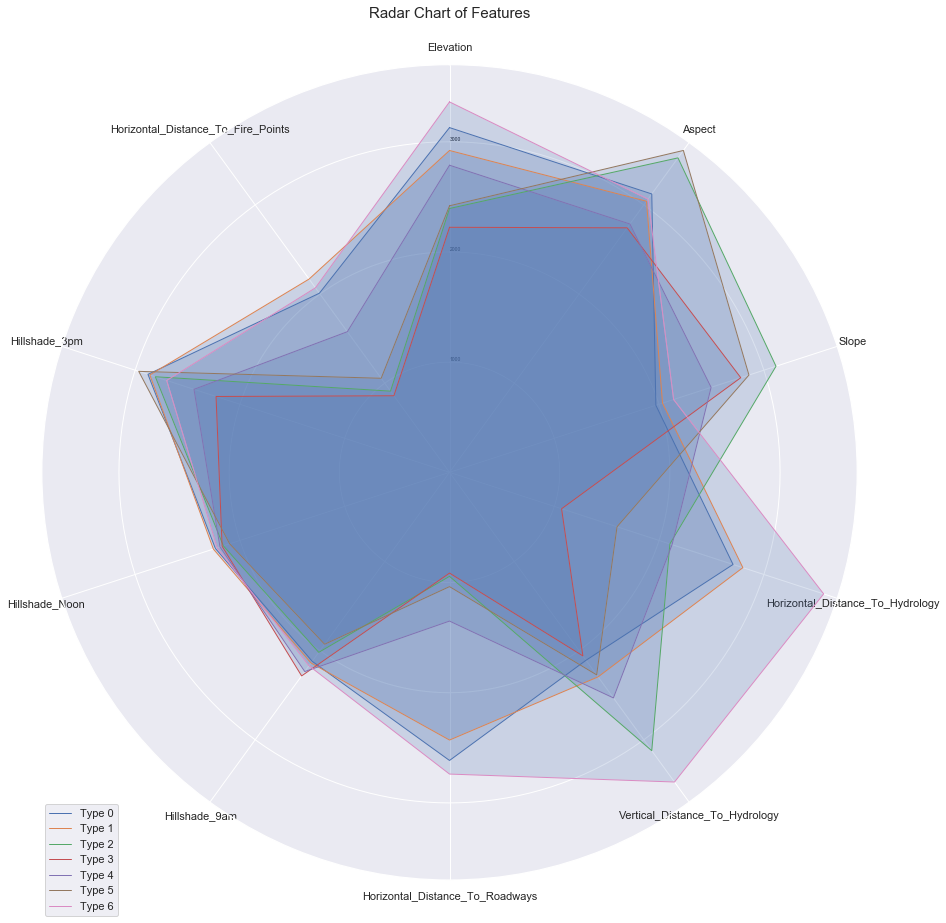

In [21]:
from math import pi

# Set data
df = pd.DataFrame({
'group': ['Type1','Type2','Type3','Type4','Type5','Type6','Type7'],
'Elevation': [avg1[0],avg2[0],avg3[0],avg4[0],avg5[0],avg6[0],avg7[0]],
'Aspect': [avg1[1]*20,avg2[1]*20,avg3[1]*20,avg4[1]*20,avg5[1]*20,avg6[1]*20,avg7[1]*20],
'Slope': [avg1[2]*150,avg2[2]*150,avg3[2]*150,avg4[2]*150,avg5[2]*150,avg6[2]*150,avg7[2]*150],
'Horizontal_Distance_To_Hydrology': [avg1[3]*10,avg2[3]*10,avg3[3]*10,avg4[3]*10,avg5[3]*10,avg6[3]*10,avg7[3]*10],
'Vertical_Distance_To_Hydrology': [avg1[4]*50,avg2[4]*50,avg3[4]*50,avg4[4]*50,avg5[4]*50,avg6[4]*50,avg7[4]*50],
'Horizontal_Distance_To_Roadways': [avg1[5],avg2[5],avg3[5],avg4[5],avg5[5],avg6[5],avg7[5]],
'Hillshade_9am': [avg1[6]*10,avg2[6]*10,avg3[6]*10,avg4[6]*10,avg5[6]*10,avg6[6]*10,avg7[6]*10],
'Hillshade_Noon': [avg1[7]*10,avg2[7]*10,avg3[7]*10,avg4[7]*10,avg5[7]*10,avg6[7]*10,avg7[7]*10],
'Hillshade_3pm': [avg1[8]*20,avg2[8]*20,avg3[8]*20,avg4[8]*20,avg5[8]*20,avg6[8]*20,avg7[8]*20],
'Horizontal_Distance_To_Fire_Points': [avg1[9],avg2[9],avg3[9],avg4[9],avg5[9],avg6[9],avg7[9]]
})



plt.figure(figsize=(20,15)) 

# number of variable
categories=list(df)[1:]
N = len(categories)
 
# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 
# Initialise the spider plot
ax = plt.subplot(111, polar=True)
 
# If you want the first axis to be on top:
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 
# Draw one axe per variable + add labels labels yet
plt.xticks(angles[:-1], categories)
 
# Draw ylabels
ax.set_rlabel_position(0)
plt.yticks([1000,2000,3000], ["1000","2000","3000"], color="black", size=5)
plt.ylim(0,3700)

plt.title('Radar Chart of Features',fontsize=15)

for i in range(0,7):
    values=df.loc[i].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, linewidth=1, linestyle='solid', label="Type %d" %i)
    ax.fill(angles, values, 'b', alpha=0.2)
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

'group': ['Type1','Type2','Type3','Type4','Type5','Type6','Type7'],
'Elevation': [avg1[0],avg2[0],avg3[0],avg4[0],avg5[0],avg6[0],avg7[0]],
'Aspect': [avg1[1],avg2[1],avg3[1],avg4[1],avg5[1],avg6[1],avg7[1]],
'Slope': [avg1[2],avg2[2],avg3[2],avg4[2],avg5[2],avg6[2],avg7[2]],
'Horizontal_Distance_To_Hydrology': [avg1[3],avg2[3],avg3[3],avg4[3],avg5[3],avg6[3],avg7[3]],
'Vertical_Distance_To_Hydrology': [avg1[4],avg2[4],avg3[4],avg4[4],avg5[4],avg6[4],avg7[4]],
'Horizontal_Distance_To_Roadways': [avg1[5],avg2[5],avg3[5],avg4[5],avg5[5],avg6[5],avg7[5]],
'Hillshade_9am': [avg1[6],avg2[6],avg3[6],avg4[6],avg5[6],avg6[6],avg7[6]],
'Hillshade_Noon': [avg1[7],avg2[7],avg3[7],avg4[7],avg5[7],avg6[7],avg7[7]],
'Hillshade_3pm': [avg1[8],avg2[8],avg3[8],avg4[8],avg5[8],avg6[8],avg7[8]],
'Horizontal_Distance_To_Fire_Points': [avg1[9],avg2[9],avg3[9],avg4[9],avg5[9],avg6[9],avg7[9]]

For a better understanding, we'd better draw a box graph.

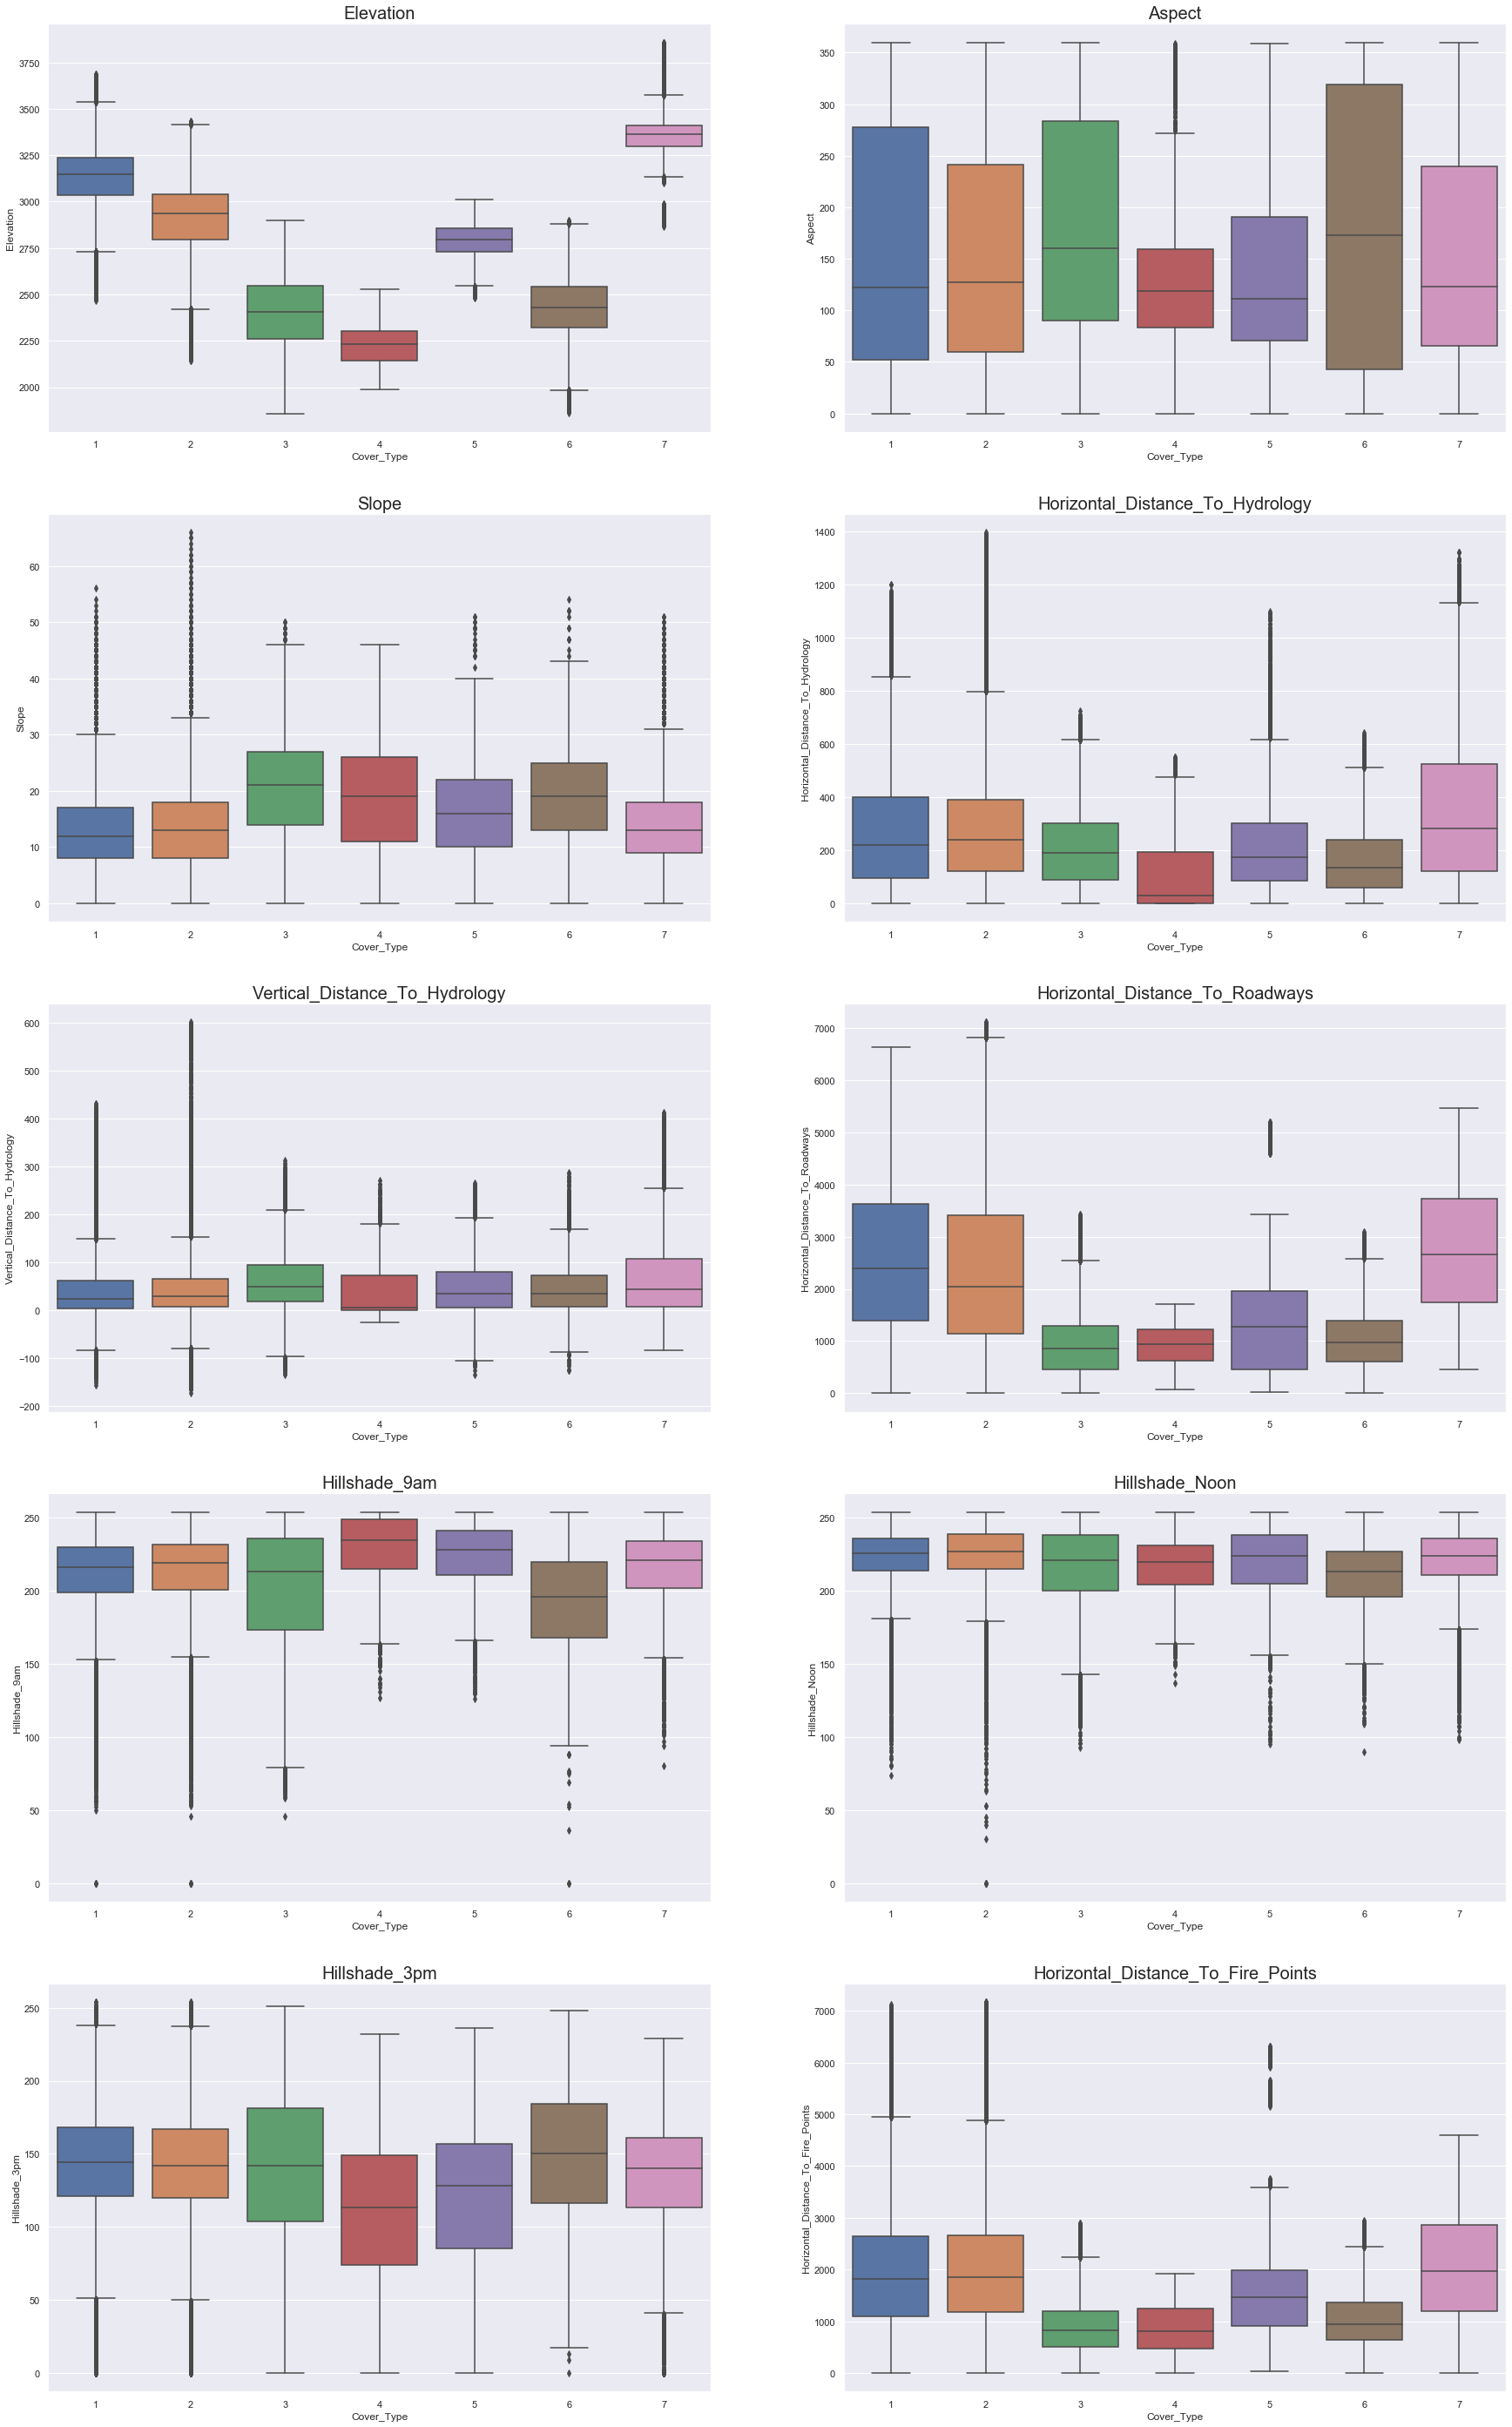

In [22]:
plt.figure(figsize=(30, 50))
for i,col in enumerate(features.columns.values):
    plt.subplot(5,2,i+1)
    sns.boxplot(x=data['Cover_Type'], y=col, data=data)
    plt.title(col, fontsize=20)
    
plt.show()

In [23]:
def rev_code(row):
    for c in soiltype.columns:
        if row[c]==1:
            return c  
cover_soil_type = pd.DataFrame()
cover_soil_type['Cover_Type'] = data['Cover_Type']
cover_soil_type['Soil_Type']=soiltype.apply(rev_code, axis=1)

In [24]:
cover_soil_type

,Cover_Type,Soil_Type
0,5,Soil_Type29
1,5,Soil_Type29
2,2,Soil_Type12
3,2,Soil_Type30
4,5,Soil_Type29
...,...,...
581007,3,Soil_Type2
581008,3,Soil_Type2
581009,3,Soil_Type2
581010,3,Soil_Type2


Text(0.5, 1.0, 'Count Plot of Soil Types')

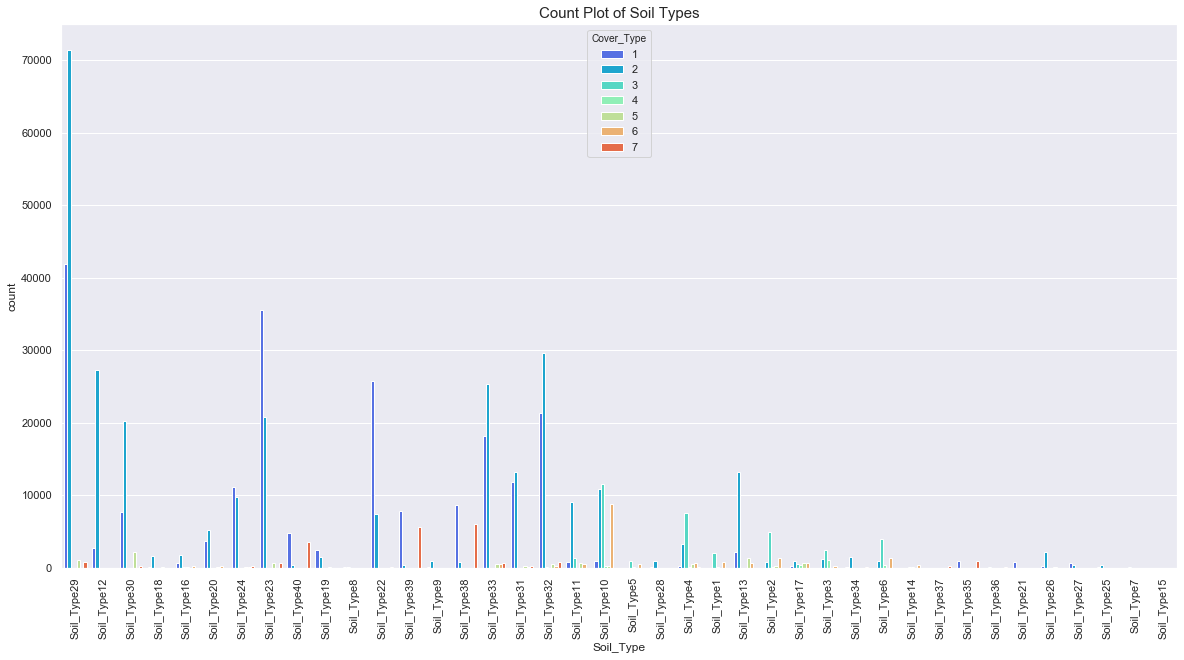

In [25]:
plt.figure(figsize=(20,10))
sns.countplot(x='Soil_Type', hue='Cover_Type',data=cover_soil_type, palette="rainbow")
plt.xticks(rotation=90)
plt.title('Count Plot of Soil Types',fontsize=15)

In [26]:
def rev_code(row):
    for c in wilderness.columns:
        if row[c]==1:
            return c  

cover_wild_type = pd.DataFrame()
cover_wild_type['Cover_Type'] = data['Cover_Type']
cover_wild_type['Wilderness_Area']=wilderness.apply(rev_code, axis=1)

In [27]:
cover_wild_type

,Cover_Type,Wilderness_Area
0,5,Wilderness_Area1
1,5,Wilderness_Area1
2,2,Wilderness_Area1
3,2,Wilderness_Area1
4,5,Wilderness_Area1
...,...,...
581007,3,Wilderness_Area3
581008,3,Wilderness_Area3
581009,3,Wilderness_Area3
581010,3,Wilderness_Area3


Text(0.5, 1.0, 'Count Plot of Wildernes Areas')

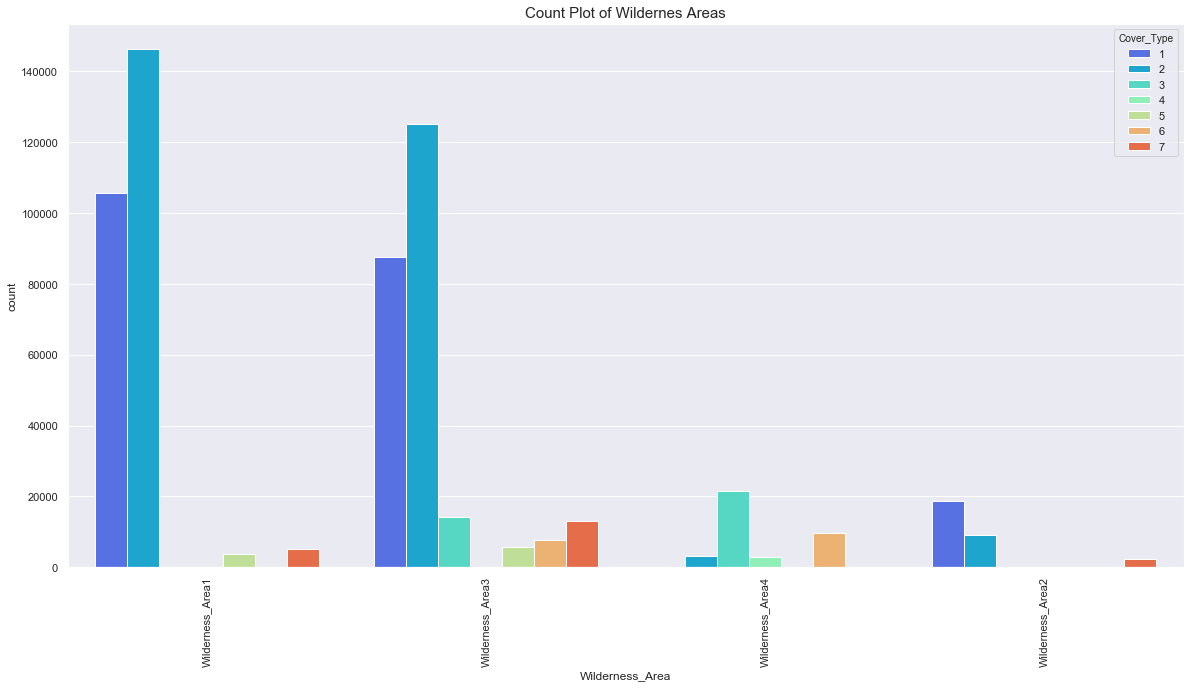

In [28]:
plt.figure(figsize=(20,10))
sns.countplot(x='Wilderness_Area', hue='Cover_Type',data=cover_wild_type, palette="rainbow")
plt.xticks(rotation=90)
plt.title('Count Plot of Wildernes Areas',fontsize=15)

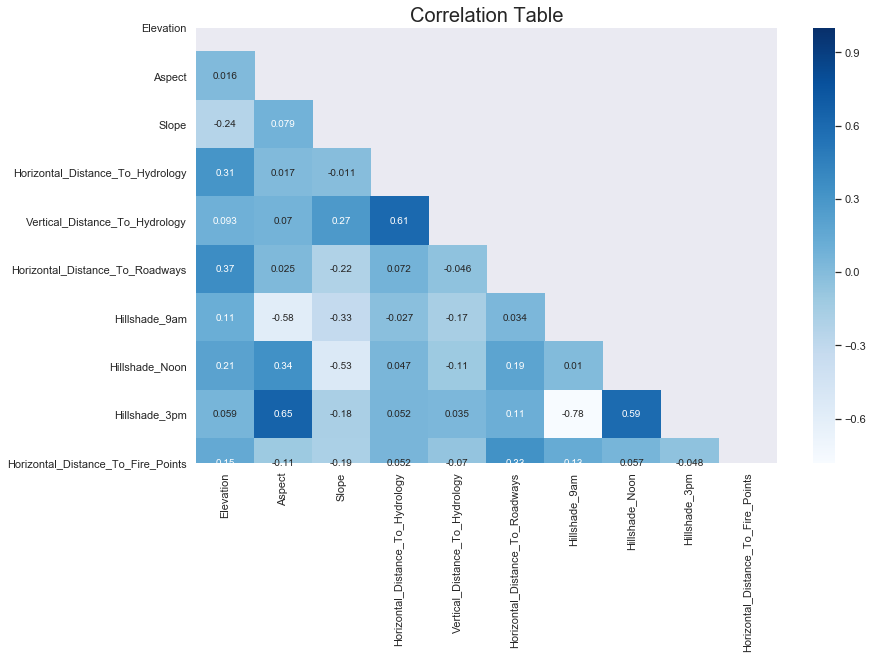

In [29]:
mask = np.zeros_like(features.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(13,8))
plt.title('Correlation Table', fontsize=20)
sns.heatmap(features.corr(),mask=mask,cmap='Blues',linecolor='white',annot=True)

__Negative Correlations:__ Hillshade_9am (-) Hillshade_3pm <br>
__Positive Correlations:__ Hillshade_Noon (+) Hillshade_3pm, Aspect (+) Hillshade_3pm, Horizontal_Distance_To_Hydrology (+) Vertical_Distance_To_Hydrology

## Data Modeling

x = independent variables (inputs) <br>
y = dependent(target) variable (Cover Type)

In [30]:
x = data.loc[:,'Elevation':'Soil_Type40']
y = data['Cover_Type']

We are going to drop the features which have low standard deviation or co-relation.

In [31]:
remove = ['Hillshade_3pm','Soil_Type7','Soil_Type8','Soil_Type14','Soil_Type15',
     'Soil_Type21','Soil_Type25','Soil_Type28','Soil_Type36','Soil_Type37']

In [32]:
x.drop(remove, axis=1, inplace=True)

In [33]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [34]:
AC = [] # Accuracy comparisons of the algorithms

### Logistic Regression

In [35]:
logreg = LogisticRegression(solver='liblinear', multi_class='ovr')
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_accuracy = accuracy_score(logreg_pred , y_test)
AC.append(logreg_accuracy)

### Decision Tree Classifier

In [36]:
dectree = DecisionTreeClassifier()
dectree.fit(x_train, y_train)
dectree_pred = dectree.predict(x_test)
dectree_accuracy = accuracy_score(dectree_pred , y_test)
AC.append(dectree_accuracy)

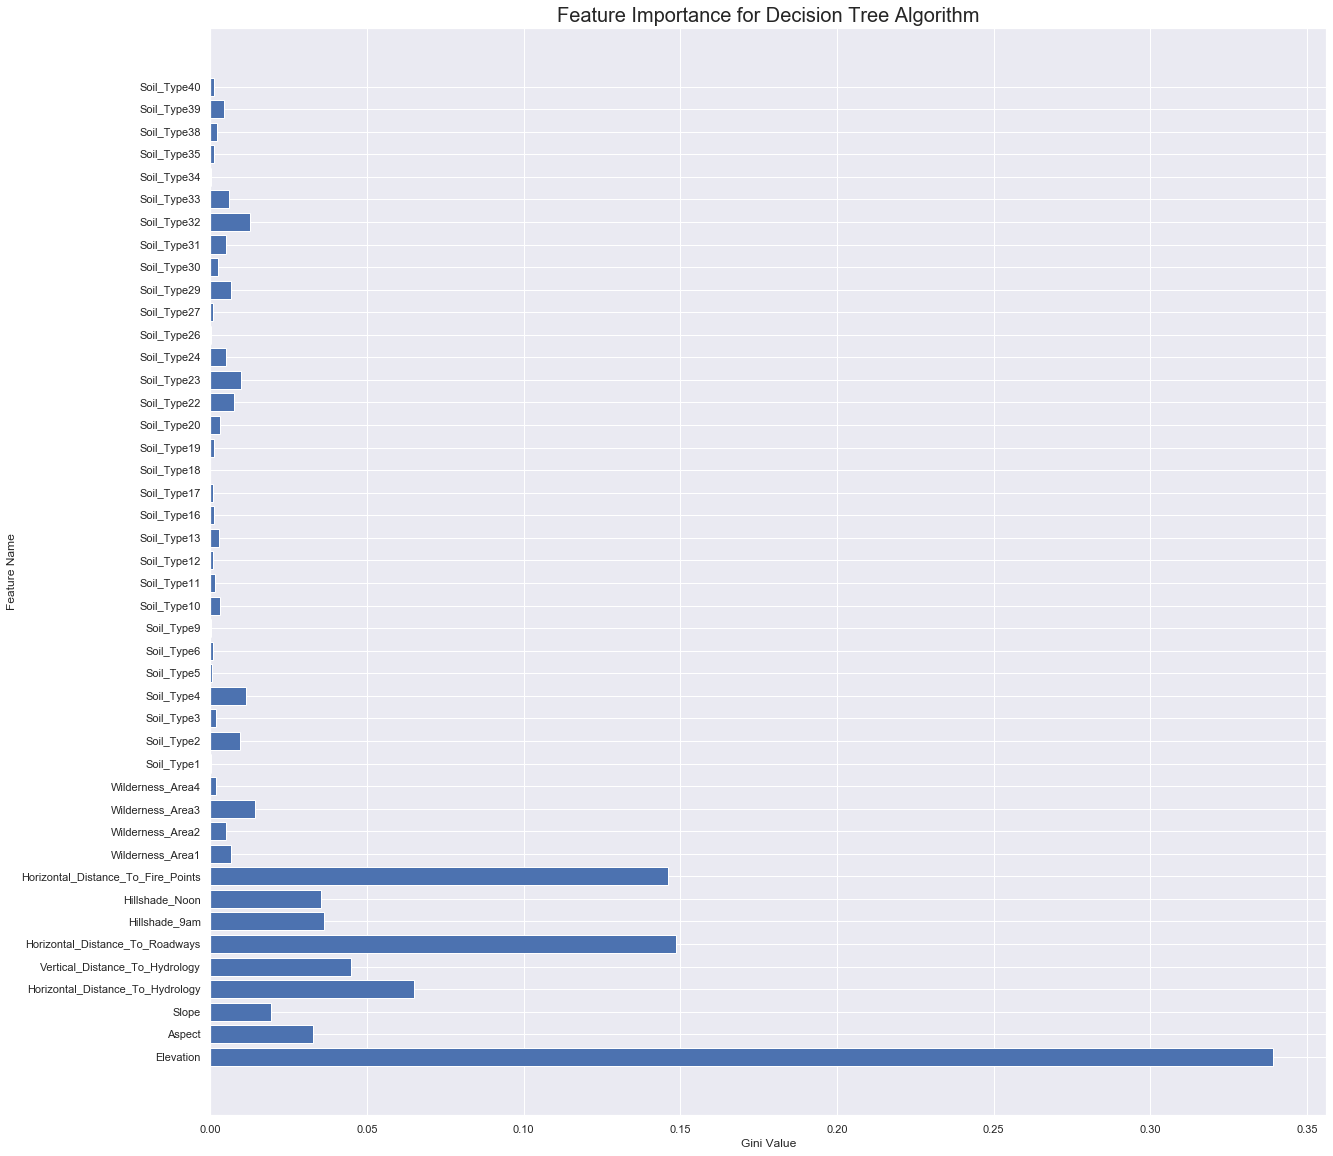

In [37]:
plt.figure(figsize=(20,20))
plt.barh(x_train.columns.values, dectree.feature_importances_)
plt.title('Feature Importance for Decision Tree Algorithm',fontsize=20)
plt.ylabel('Feature Name')
plt.xlabel('Gini Value')
plt.show()

In [38]:
from sklearn import tree

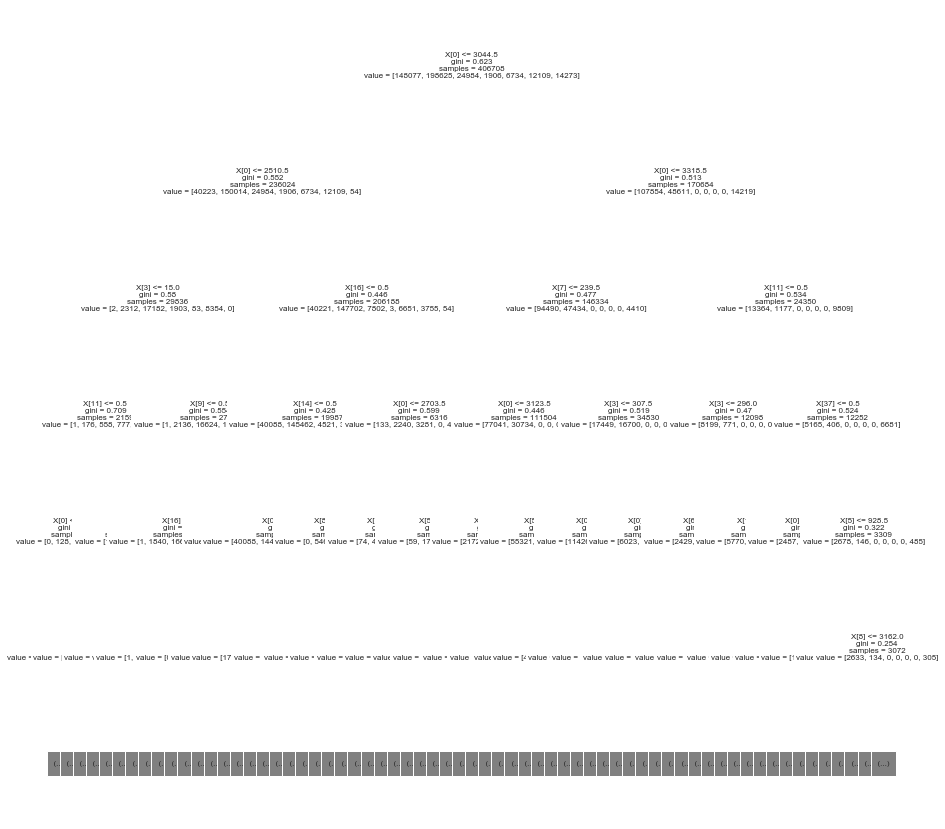

In [39]:
plt.figure(figsize=(15,15))
tree.plot_tree(dectree, max_depth=5, fontsize=8)
plt.show()

### Random Forest Classifier

In [40]:
randfor = RandomForestClassifier()
randfor.fit(x_train, y_train)
randfor_pred = randfor.predict(x_test)
randfor_accuracy = accuracy_score(randfor_pred , y_test)
AC.append(randfor_accuracy)

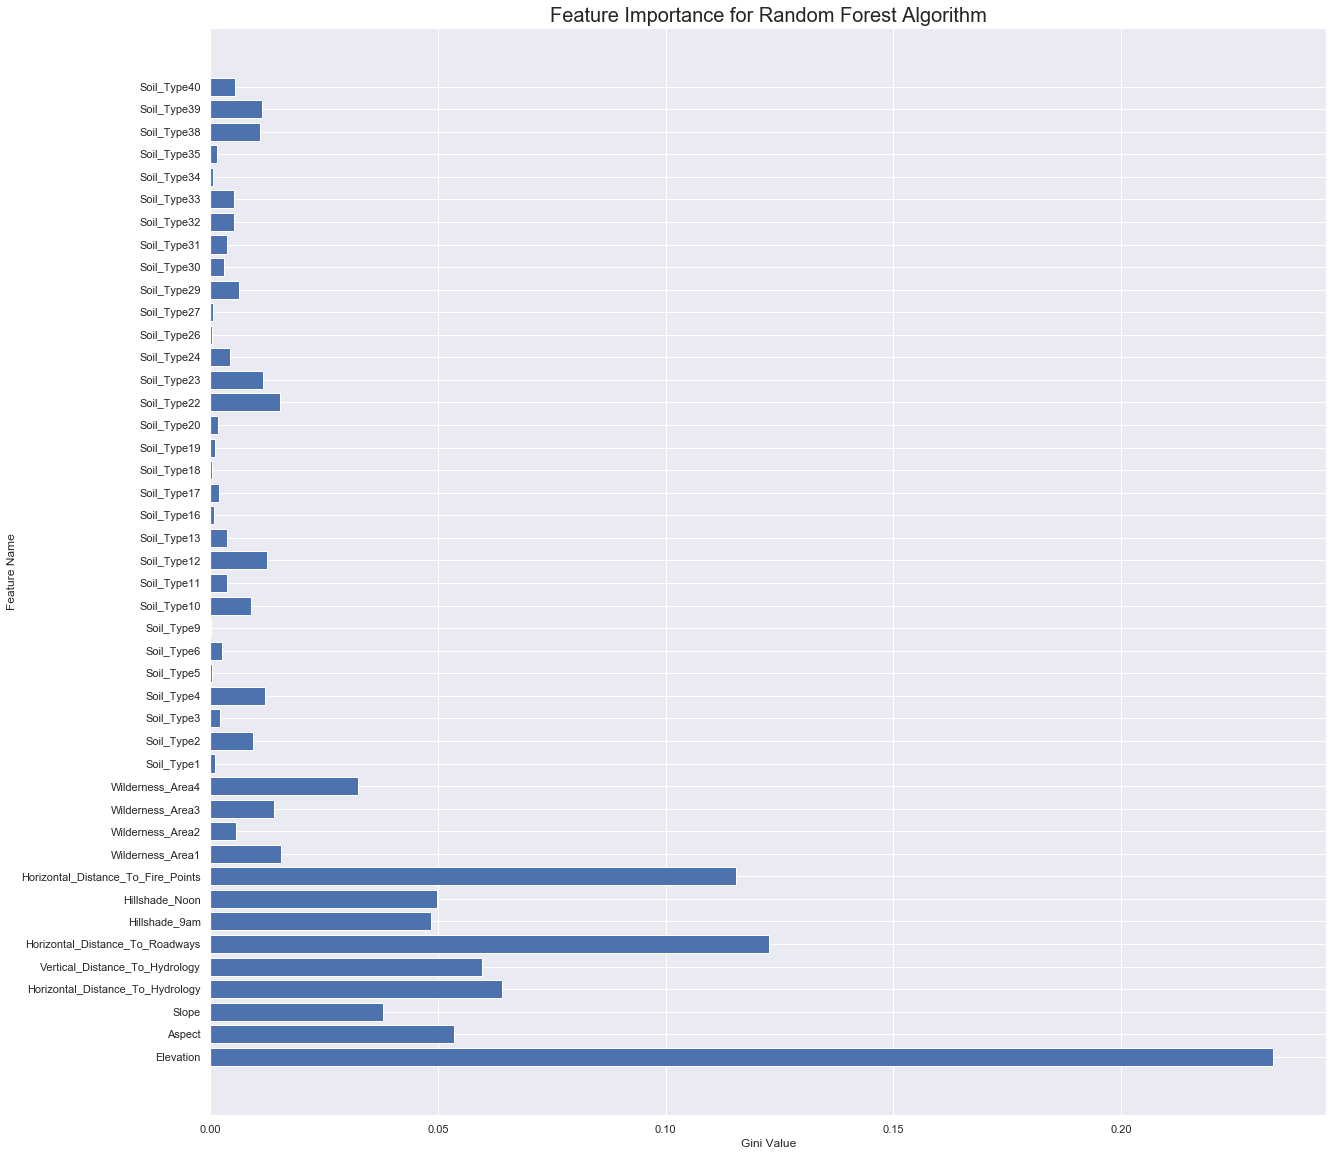

In [41]:
plt.figure(figsize=(20,20))
plt.barh(x_train.columns.values, randfor.feature_importances_)
plt.title('Feature Importance for Random Forest Algorithm',fontsize=20)
plt.ylabel('Feature Name')
plt.xlabel('Gini Value')
plt.show()

### KNN Classifier (K Nearest Neighbor Algorithm)

In [42]:
neighbors = np.arange(1,7)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    train_accuracy[i] = knn.score(x_train, y_train)
    test_accuracy[i] = knn.score(x_test, y_test)

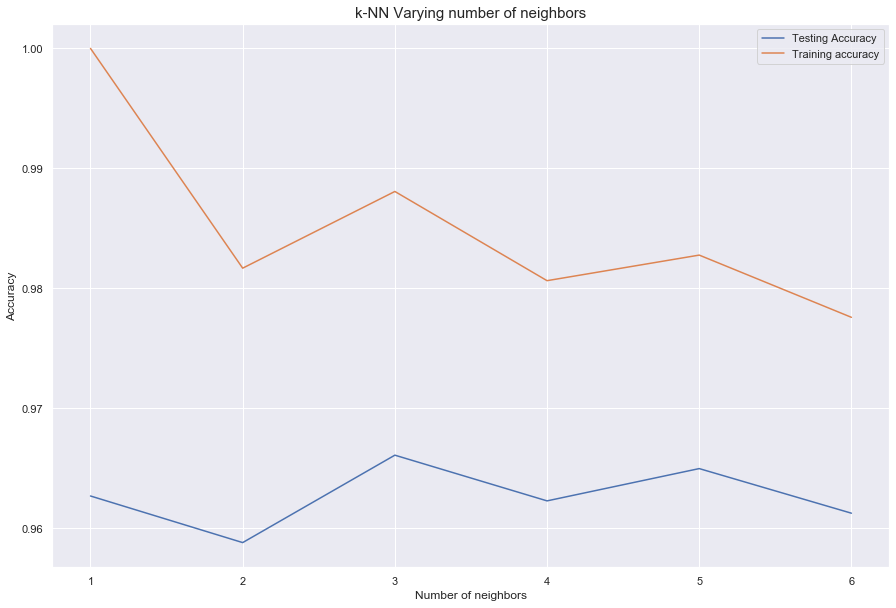

In [43]:
plt.figure(figsize=(15,10))
plt.title('k-NN Varying number of neighbors', fontsize=15)
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [45]:
knn_accuracy=knn.score(x_test,y_test)
print('KNN Accuracy:',knn_accuracy)
AC.append(knn_accuracy)

KNN Accuracy: 0.9660994584174775


In [46]:
predicted = knn.predict(x_test)

In [47]:
predicted
pre = pd.DataFrame(data=predicted, columns=['Pre'])
pre

,Pre
0,2
1,5
2,1
3,2
4,2
...,...
174299,5
174300,2
174301,7
174302,1


In [48]:
y_test
Y_test = pd.DataFrame(data=y_test)
yy_test = Y_test.reset_index()
yy_test.drop(columns=['index'])

,Cover_Type
0,2
1,2
2,1
3,2
4,2
...,...
174299,5
174300,2
174301,7
174302,1


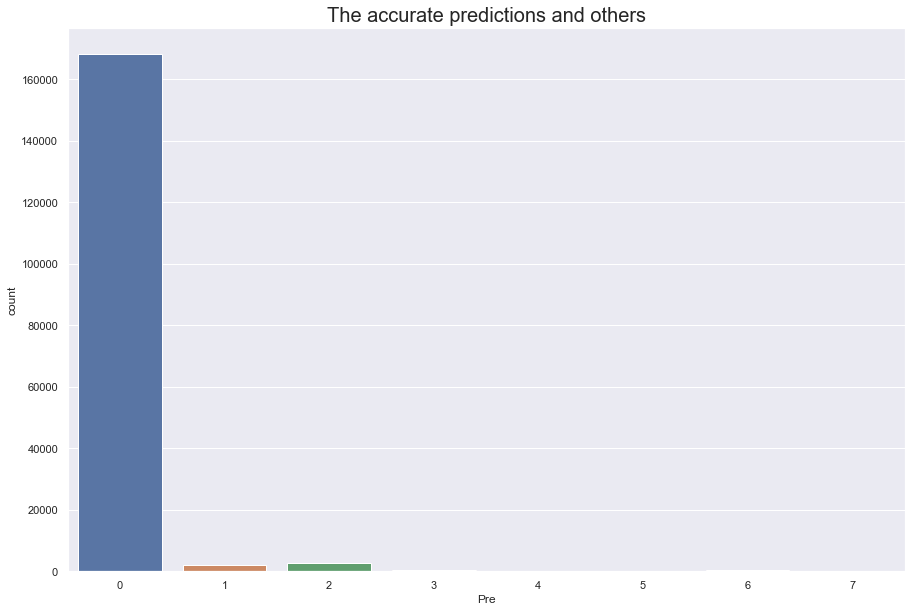

In [49]:
hold = pd.DataFrame(columns=['Pre'])
a = []
counter = 0
for i in range(0,174304):
    if pre['Pre'][i] != yy_test['Cover_Type'][i]:
        a.append(pre['Pre'][i])
        counter = counter + 1
    else:
        a.append(0)
        counter = counter + 1

hold['Pre'] = a
A = range(0,174304)
plt.figure(figsize=(15,10))
sns.countplot(x='Pre', data=hold)
plt.title('The accurate predictions and others', fontsize=20)
plt.show()

In [50]:
accurate = 0
not_accurate = 0
for i in A:
    if hold['Pre'][i] == 0:
        accurate = accurate + 1
    else:
        not_accurate = not_accurate + 1

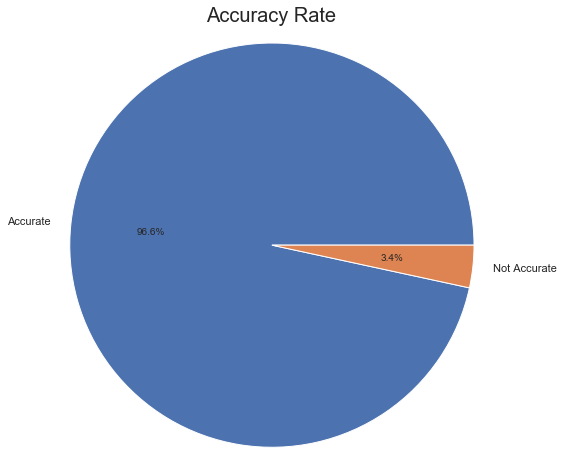

In [51]:
labels = 'Accurate', 'Not Accurate'
sizes = [accurate, not_accurate]

fig1, ax1 = plt.subplots()
fig1.set_size_inches(8,8)
ax1.pie(sizes, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.title('Accuracy Rate', fontsize=20)
plt.show()

In [52]:
accuracydata = pd.DataFrame(data=None,columns=['Accuracy'], index=['Logistic Regression','Decision Tree Classifier','Random Forest Classifier','KNN Algorithm'])
accuracydata['Accuracy'][0] = AC[0]
accuracydata['Accuracy'][1] = AC[1]
accuracydata['Accuracy'][2] = AC[2]
accuracydata['Accuracy'][3] = AC[3]
accuracydata

,Accuracy
Logistic Regression,0.697878
Decision Tree Classifier,0.933777
Random Forest Classifier,0.943817
KNN Algorithm,0.966099


Text(0.5, 1.0, 'Comparison of Accuracy Rates of the Algorithms')

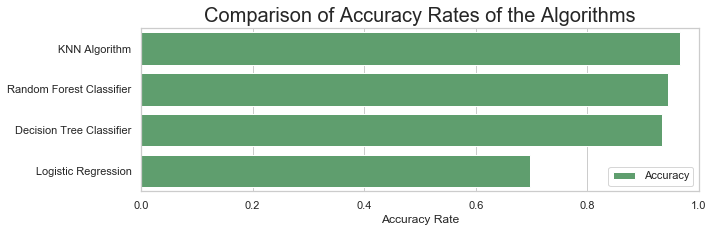

In [53]:
sns.set(style="whitegrid")

f, ax = plt.subplots(figsize=(10, 3))
accuracydata = accuracydata.sort_values("Accuracy", ascending=False)

sns.set_color_codes("deep")
sns.barplot(x="Accuracy", y=accuracydata.index, data=accuracydata,label="Accuracy", color="g")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(xlim=(0, 1), ylabel="",xlabel="Accuracy Rate")

plt.title('Comparison of Accuracy Rates of the Algorithms', fontsize=20)

We can see the KNN Algorithm has the most accuracy rate.

In [54]:
def predictor(el,asp,sc,hh,vh,hr,h9,hN,hf,wa,st):
    datap = {'Elevation':0, 'Aspect':0, 'Slope':0, 'Horizontal_Distance_To_Hydrology':0,
       'Vertical_Distance_To_Hydrology':0, 'Horizontal_Distance_To_Roadways':0,
       'Hillshade_9am':0, 'Hillshade_Noon':0, 'Horizontal_Distance_To_Fire_Points':0, 'Wilderness_Area1':0,
       'Wilderness_Area2':0, 'Wilderness_Area3':0, 'Wilderness_Area4':0,
       'Soil_Type1':0, 'Soil_Type2':0, 'Soil_Type3':0, 'Soil_Type4':0, 'Soil_Type5':0,
       'Soil_Type6':0, 'Soil_Type9':0, 'Soil_Type10':0,
       'Soil_Type11':0, 'Soil_Type12':0, 'Soil_Type13':0, 
       'Soil_Type16':0, 'Soil_Type17':0, 'Soil_Type18':0,
       'Soil_Type19':0, 'Soil_Type20':0, 'Soil_Type22':0,
       'Soil_Type23':0, 'Soil_Type24':0, 'Soil_Type26':0,
       'Soil_Type27':0, 'Soil_Type29':0, 'Soil_Type30':0,
       'Soil_Type31':0, 'Soil_Type32':0, 'Soil_Type33':0, 
       'Soil_Type34':0, 'Soil_Type35':0, 'Soil_Type38':0,
       'Soil_Type39':0, 'Soil_Type40':0}
    datapre = pd.DataFrame(data=datap,index=[0])
    datapre['Elevation'] = el
    datapre['Aspect'] = asp
    datapre['Slope'] = sc
    datapre['Horizontal_Distance_To_Hydrology'] = hh
    datapre['Vertical_Distance_To_Hydrology'] = vh
    datapre['Horizontal_Distance_To_Roadways'] = hr
    datapre['Hillshade_9am'] = h9
    datapre['Hillshade_Noon'] = hN
    datapre['Horizontal_Distance_To_Fire_Points'] = hf
    datapre['Wilderness_Area' + str(wa)] =1
    datapre['Soil_Type' + str(st)] =1
    predicted = knn.predict(datapre)
    print('The predicted cover type is: ' + str(predicted))

In [55]:
predictor(2884,33,12,350,58,872,218,214,1544,3,35)

The predicted cover type is: [5]
